# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [2]:
#Passo a Passo de um Projeto de Ciência de Dados
#Passo 1: Entendimento do Desafio
    # Prever um preço de um barco baseado em suas características
#Passo 2: Entendimento da Área/Empresa
#Passo 3: Extração/Obtenção de Dados
#Passo 4: Ajuste de Dados (Tratamento/Limpeza)
#Passo 5: Análise Exploratória
#Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
#Passo 7: Interpretação de Resultados

In [3]:
import pandas as pd

base1 = pd.read_csv("barcos_ref.csv")
display(base1)
#os itens TipoBanco; TipoVenda e Material estão em números pois na ciência de dados nós instruimos a máquina a fazer calculos
#por isso, como os computadores so conseguem aprender com números, eles só podem ler números, 
#tipo de barco 1 significa Center console boat
#para adaptar o projeto a outro tema basta criar uma nova tabela com o que cada numero significa
#no final voce converter novamente de numero pra texto

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [4]:
#Passo 4: Ajuste de Dados (Tratamento/Limpeza)

print(base1.info())
#no caso nós não precisamos tratar os dados
#mas se precisar tratar, olhe a aula 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


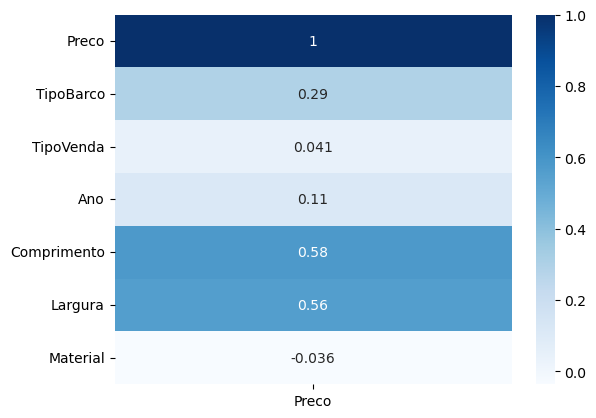

In [14]:
#Passo 5: Análise Exploratória
#correlação entre os itens da base de dados, ex: será que quanto mais antigo mais barato o item é?
#se trata de fazer questionamentos sobre as informações.
#ex 1: Vendas = [10, 20, 30], Investimentos = [1, 2, 3], correlacionamento = 1 = 100%
#ex 2: Vendas = [10, 20 ,30] Investimento = [2, 5, 6], correlacionamento = 0,9 = 90%, é perto de 1, n é um e é maior que 0,5
#ex 3: Vendas = [10, 20 ,30] Investimentos = [2, 1, 3] correlacionamento = 0,2 = 20%, menor que 0,5, proximo de 0
#ex 4: se a correlação for inversamente proporcional, corr == -x


#vamos calcular a correlação entre os itens do barco

correlacao = base1.corr()[["Preco"]]   #[[Preco]] pega so a coluna de preços e imprime bonitinho, por isso os dois colchetes
display(correlacao) #calcula a correlação

#bibliotecas de gráfico igual ao Plotly
import seaborn as sns #usa o plt, mas deixa os gráficos super bonitos, mas usa o plt, por isso voce cria com o sns e exibe com o plt
import matplotlib.pyplot as plt

#cria o gráfico
sns.heatmap(correlacao, cmap="Blues", annot=True) #criando o mapa de calor, organiza a tabela por ordem descrescente para ficar organizado

#exibe o gráfico
plt.show()

In [52]:
#Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
    #dividir a base em x e y

y = base1[["Preco"]] #preço é um valor objetivo, e voce so pode ter um, no caso de você precisar do lucro, 
                    #teria que trasnformá-lo em uma nova vavriável e torná-lo em um só objetivo
    
x = base1.drop("Preco", axis=1) #axis = 1 para pegar coluna    

display(y)
display(x)

#agora separamos os dados em dados de treino e de teste, separando as duas tabelas mais duas vezes em dados de x e y

#para isso usaremos train test split, uma função de um dos pacotes mais importantes para ia
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)  # a ordem das variáveis precisa ser esta

,Preco
0,3490
1,3399
2,3600
3,3500
4,3500
...,...
7644,5000
7645,4999
7646,4950
7647,4499


,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,1,1,2020,4.00,1.50,1
1,2,1,2019,3.55,1.46,2
2,3,2,1999,6.20,2.38,2
3,2,2,1987,4.35,1.75,3
4,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...
7644,7,2,1974,7.20,2.70,3
7645,4,2,1980,6.00,2.10,3
7646,2,2,1984,6.00,1.62,5
7647,4,1,2020,4.40,1.80,3


In [53]:
# importar a inteligencia artificial
#regressão linear e a Árvore de Decisão

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria a inteligencia artificial, ela quando é criada ela é burra

modelo_regressaolinear = LinearRegression()
modelo_arvorededecisao = RandomForestRegressor()

# treinar ela

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvorededecisao.fit(x_treino, y_treino)

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_12148\2914530790.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_arvorededecisao.fit(x_treino, y_treino)


RandomForestRegressor()

In [54]:
#Passo 7: Interpretação de Resultados


#escolher o melhor modelo
from sklearn.metrics import r2_score

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvorededecisao = modelo_arvorededecisao.predict(x_teste)

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvorededecisao)) #este é o melhor modelo para esse exemplo



0.36544401781660096
0.6128374725166494


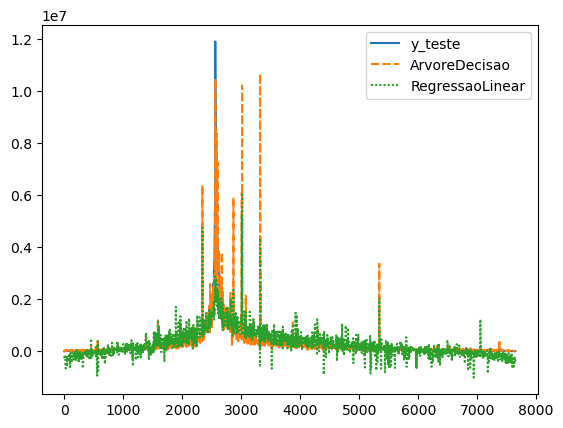

In [55]:
#visualizar as previsões

tabela_aux = pd.DataFrame()
tabela_aux["y_teste"] = y_teste
tabela_aux["ArvoreDecisao"] = previsao_arvorededecisao
tabela_aux["RegressaoLinear"] = previsao_regressaolinear

sns.lineplot(data=tabela_aux)
plt.show()

In [58]:
#fazer novas previsões (usando a IA na prática)

tabela_nova = pd.read_csv("novos_barcos.csv")
display(tabela_nova)

previsao = modelo_arvorededecisao.predict(tabela_nova)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 8582.66788095 10894.88333333 17511.6       ]
